In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from Modeling_functions import *

In [3]:
df=pd.read_csv('../data/Season_2018.csv')

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
n = 75
df=df.head(int(len(df)*(n/100)))

In [6]:
n = 25
df2=df.tail(int(len(df)*(n/100)))

Find and eliminate NaNs

In [7]:
# df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
#          'H_Opp_win_probability_subtracted'],axis=1)

In [8]:
# df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
#          'H_Opp_win_probability_subtracted','H_median_odds','A_median_odds','fav_win','home_fav'],axis=1)

In [9]:
df.home_win.value_counts(normalize=True)

1    0.522241
0    0.477759
Name: home_win, dtype: float64

In [10]:
df2.home_win.value_counts(normalize=True)

1    0.525275
0    0.474725
Name: home_win, dtype: float64

In [11]:
#df2.drop_duplicates(inplace=True)
df2

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_strikes_swinging,A_Opp_strikes_looking,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
1366,COL,34.024691,4.802469,8.728395,4.604938,4.624012,3.104938,8.586420,37.919753,0.251395,...,17.012346,26.265432,12.364198,13.030864,6.129630,0.000000,51.487654,0.015691,0.197531,0
1367,MIA,34.086957,3.658385,8.093168,3.440994,3.325901,2.826087,8.596273,37.782609,0.232317,...,16.623457,25.216049,11.290123,13.728395,6.413580,0.012346,50.697531,-0.045049,-0.317284,0
1368,LAA,33.777778,4.450617,8.166667,4.259259,4.300185,3.172840,8.024691,37.703704,0.235302,...,15.030864,23.660494,11.469136,14.888889,6.555556,0.012346,51.259259,-0.008321,0.216667,1
1369,CLE,34.537037,5.049383,8.932099,4.851852,4.833519,3.419753,7.339506,38.888889,0.251302,...,15.475309,23.895062,12.679012,14.746914,6.870370,0.000000,51.938272,0.040080,0.070370,0
1370,PIT,33.832298,4.298137,8.577640,4.130435,4.054037,2.944099,7.633540,37.677019,0.248329,...,16.283951,24.055556,10.950617,14.450617,6.006173,0.000000,50.617284,0.009531,-0.360494,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,SDP,33.864198,3.808642,7.956790,3.598765,3.550988,2.907407,9.401235,37.401235,0.231272,...,17.012346,26.265432,12.364198,13.030864,6.129630,0.000000,51.487654,0.015691,0.197531,0
1817,KCR,33.981481,3.938272,8.333333,3.740741,3.663580,2.635802,8.086420,37.425926,0.241000,...,15.691358,25.271605,11.753086,15.061728,6.370370,0.012346,51.783951,0.004228,0.095679,1
1818,MIN,34.111111,4.555556,8.512346,4.345679,4.330062,3.296296,8.197531,37.987654,0.245809,...,14.555556,24.703704,11.086420,15.833333,6.740741,0.012346,53.166667,0.066901,0.687037,1
1819,TEX,33.660494,4.549383,8.074074,4.296296,4.298580,3.425926,9.160494,38.043210,0.234926,...,16.314815,25.413580,11.030864,14.320988,6.617284,0.006173,51.277778,0.002444,0.030247,1


In [12]:
df.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_strikes_swinging,A_Opp_strikes_looking,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,NYM,33.753086,4.172840,7.913580,4.006173,3.957531,3.493827,8.666667,38.129630,0.227963,...,16.104938,25.104938,12.265432,14.135802,6.796296,0.012346,50.376543,-0.040932,-0.425309,1
1,TEX,33.660494,4.549383,8.074074,4.296296,4.298580,3.425926,9.160494,38.043210,0.234926,...,18.549383,25.808642,10.456790,12.543210,5.716049,0.006173,48.870370,-0.019704,-0.457407,0
2,MIA,34.086957,3.658385,8.093168,3.440994,3.325901,2.826087,8.596273,37.782609,0.232317,...,15.185185,26.271605,12.117284,13.913580,6.697531,0.012346,51.425926,-0.004728,-0.308642,0
3,KCR,33.981481,3.938272,8.333333,3.740741,3.663580,2.635802,8.086420,37.425926,0.241000,...,15.055556,24.962963,11.197531,15.561728,6.635802,0.012346,54.080247,0.056796,0.490741,0
4,SDP,33.864198,3.808642,7.956790,3.598765,3.550988,2.907407,9.401235,37.401235,0.231272,...,16.623457,25.216049,11.290123,13.728395,6.413580,0.012346,50.697531,-0.045049,-0.317284,0


In [13]:
#for col in X_train.columns:
    #print(col)

In [14]:
zero_importance_list=['H_runs','H_slugging_percentage','H_on_base_plus','H_base_out_runs_added','H_putouts',
                     'H_Opp_on_base_percentage','A_batting_average','A_win_probability_for_offensive_player',
                     'A_putouts']

In [15]:
tiny_importance_list=['H_at_bats','H_win_probability_added','H_fly_balls']

In [16]:
df2.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_strikes_swinging,A_Opp_strikes_looking,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
1366,COL,34.024691,4.802469,8.728395,4.604938,4.624012,3.104938,8.586420,37.919753,0.251395,...,17.012346,26.265432,12.364198,13.030864,6.129630,0.000000,51.487654,0.015691,0.197531,0
1367,MIA,34.086957,3.658385,8.093168,3.440994,3.325901,2.826087,8.596273,37.782609,0.232317,...,16.623457,25.216049,11.290123,13.728395,6.413580,0.012346,50.697531,-0.045049,-0.317284,0
1368,LAA,33.777778,4.450617,8.166667,4.259259,4.300185,3.172840,8.024691,37.703704,0.235302,...,15.030864,23.660494,11.469136,14.888889,6.555556,0.012346,51.259259,-0.008321,0.216667,1
1369,CLE,34.537037,5.049383,8.932099,4.851852,4.833519,3.419753,7.339506,38.888889,0.251302,...,15.475309,23.895062,12.679012,14.746914,6.870370,0.000000,51.938272,0.040080,0.070370,0
1370,PIT,33.832298,4.298137,8.577640,4.130435,4.054037,2.944099,7.633540,37.677019,0.248329,...,16.283951,24.055556,10.950617,14.450617,6.006173,0.000000,50.617284,0.009531,-0.360494,0


In [17]:
def data_preprocessing(df, df2):
    X_train = df.drop(['home_win','H_name','A_name'], axis=1)
    X_test = df2.drop(['home_win','H_name','A_name'], axis=1)
    y_train = df.home_win
    y_test= df2.home_win
    
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled,y_train,y_test

In [18]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [19]:
# X_test_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [20]:
# X_train_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [24]:
zero_imp_train=X_train_scaled.drop(zero_importance_list,axis=1)
zero_imp_test=X_test_scaled.drop(zero_importance_list,axis=1)

## Feature Selection

In [71]:
# pca=PCA(n_components=0.7)
# train_pca=pca.fit_transform(X_train_scaled)
# test_pca=pca.transform(X_test_scaled)

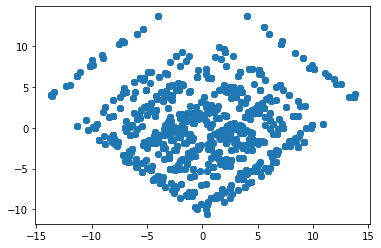

In [51]:
#plt.scatter(train_pca[:,0], train_pca[:,1]);

In [23]:
feats= feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)

In [15]:
X_train_best_log = X_train_scaled[feats]
X_test_best_log = X_test_scaled[feats]

# Logistic Regression

### All Feats

Penalty: l1
Solver: saga
Mean Cross-Val Score: 0.5908851422550053
Train Mean Accuracy: 0.6090060406370126
Test Mean Accuracy: 0.5846153846153846
Recall Score: 0.6150627615062761
Precision Score: 0.6024590163934426
F1 Score: 0.608695652173913


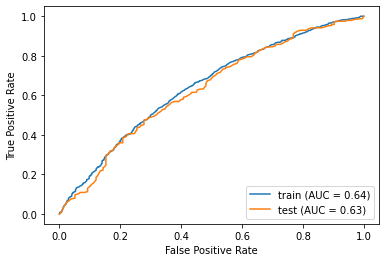

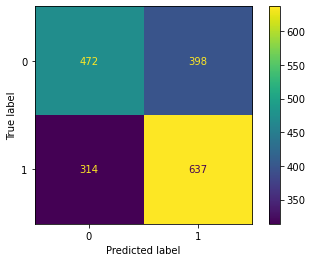

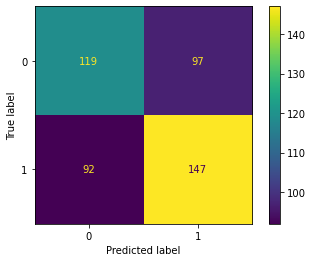

In [16]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

In [28]:
def new_acc(probabilities):
    class_list2=[]
    for log in probabilities:
        if log[0]<.40:
            class_list2.append(1)
        elif log[0]>.60:
            class_list2.append(0)
        else:
            class_list2.append(3)
    y_pred_class=pd.DataFrame(class_list2)
    y_pred_class.reset_index(inplace=True)
    y_test_df=pd.DataFrame(y_test)
    y_test_df.reset_index(inplace=True)
    comb=pd.concat([y_test_df,y_pred_class],axis=1)
    comb.drop(['index','index'],axis=1,inplace=True)
    comb['pred']=comb[0]
    comb.drop([0],axis=1,inplace=True)
    comb.drop(comb[comb['pred'] == 3].index, inplace = True)
    count=0
    for bools in comb['home_win']==comb['pred']:
        if bools is True:
            count+=1
        else:
            pass
    accuracy=count/len(comb)
    
    return accuracy,count

In [21]:
new_acc(probabilities)

(0.6878306878306878, 130)

### Home_win, zero imp
***

In [25]:
feats= feature_select(zero_imp_train,y_train,LogisticRegression,min_features=10)

In [26]:
X_train_best_log = zero_imp_train[feats]
X_test_best_log = zero_imp_test[feats]

Penalty: l2
Solver: newton-cg
Mean Cross-Val Score: 0.5936233629384315
Train Mean Accuracy: 0.6068094453596925
Test Mean Accuracy: 0.5956043956043956
Recall Score: 0.6192468619246861
Precision Score: 0.6141078838174274
F1 Score: 0.6166666666666666


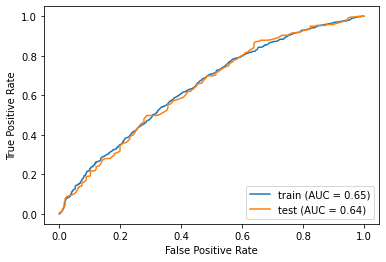

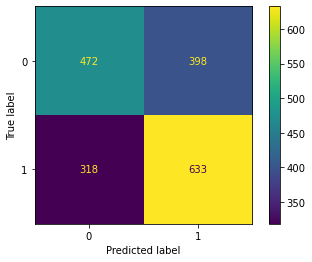

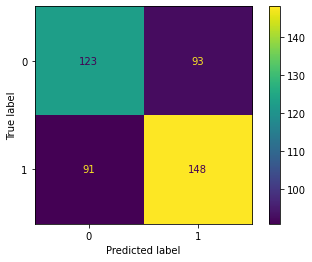

In [27]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

In [29]:
new_acc(probabilities)

(0.6712962962962963, 145)

### Explore thresehold movement and other things

In [94]:
logregs=LogisticRegression()
logregs.fit(X_train_scaled,y_train)

LogisticRegression()

In [95]:
logregs.predict_proba(X_test_scaled)[:,1] >= 0.6

array([ True,  True,  True,  True, False,  True, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False])

In [47]:
decisions = (logregs.predict_proba(X_test_scaled) >= .6).astype(int)
len(decisions)

54

In [97]:
today_winners = np.where(y_test!= predictions,'Away','Home')

In [101]:
today_winners

array(['Home', 'Home', 'Home', 'Home', 'Away', 'Home', 'Home', 'Away',
       'Away', 'Away', 'Home', 'Home', 'Away', 'Home', 'Home', 'Home',
       'Away', 'Home', 'Away', 'Away', 'Home', 'Away', 'Home'],
      dtype='<U4')

7 out of 9 playoff series correctly predicted

# KNN

### Home win KNN All Feats

Number of Neighbors: 13
Metric: minkowski
Weights: uniform
Mean Cross-Val Score: 0.5645235586331477
Train Mean Accuracy: 0.6457990115321252
Test Mean Accuracy: 0.6505494505494506
Recall Score: 0.7447698744769874
Precision Score: 0.644927536231884
F1 score: 0.6912621359223301


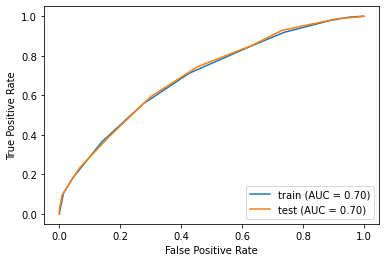

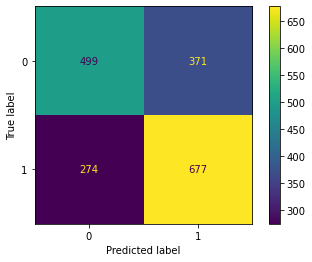

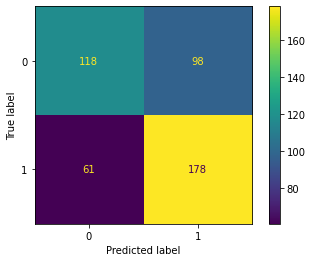

In [22]:
prediction,probabilities=knn(X_train_scaled,X_test_scaled,y_train,y_test)

In [23]:
new_acc(probabilities)

(0.6884735202492211, 221)

### Zero Imp

Number of Neighbors: 15
Metric: manhattan
Weights: uniform
Mean Cross-Val Score: 0.5606728887550805
Train Mean Accuracy: 0.6254805052169138
Test Mean Accuracy: 0.6285714285714286
Recall Score: 0.698744769874477
Precision Score: 0.6325757575757576
F1 score: 0.6640159045725647


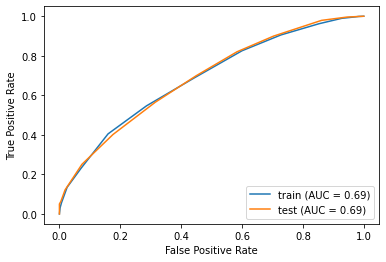

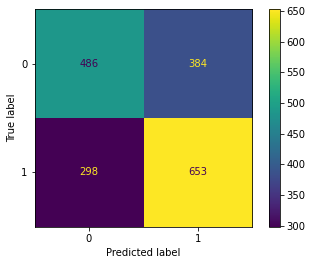

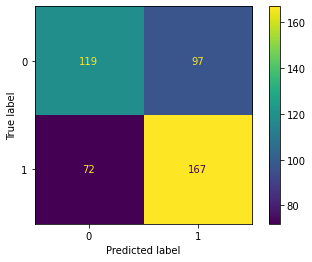

In [30]:
prediction,probabilities=knn(zero_imp_train,zero_imp_test,y_train,y_test)

In [31]:
new_acc(probabilities)

(0.7207207207207207, 160)

# Decision Tree

In [24]:
dfeats= feature_select(X_train_scaled,y_train,DecisionTreeClassifier,min_features=10)
X_train_best_tree = X_train_scaled[dfeats]
X_test_best_tree = X_test_scaled[dfeats]

### Dtree Home Win

Max Depth: 3
Min Sample Split: 2
criterion: entropy
Mean Cross-Val Score: 0.5784319714903907
Train Mean Accuracy: 0.608480856319473
Test Mean Accuracy: 0.5909090909090909
Recall Score: 0.5454545454545454
Precision Score: 0.6
F1 score: 0.5714285714285713


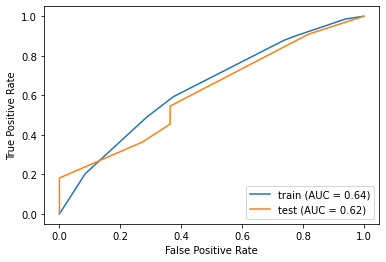

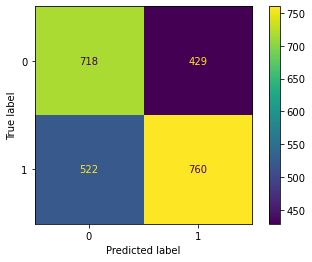

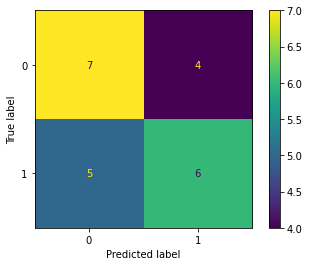

In [25]:
predictions,probabilities=dtree(X_train_best_tree,X_test_best_tree,y_train,y_test)

In [27]:
new_acc(probabilities)

0.5833333333333334

# Random Forest

### Model

In [32]:
def random_forest(X_train, X_test, y_train, y_test, cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'n_estimators': [75,90,100,110,115,125,150,500],
    'criterion': ['gini', 'entropy']}
    
    # Instantiate & fit Random Forest model for GridSearch
    grid_rf = RandomForestClassifier()
    grid_rf.fit(X_train,y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_rf, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    rf_params = gs.best_params_
    
    # Use best # of trees from best_params
    rf_n_estimators = rf_params['n_estimators']
    print(f'Number of Trees: {rf_n_estimators}')
    
    # Use best criterion from best_params
    rf_criterion = rf_params['criterion']
    print(f'criterion: {rf_criterion}')
    
    # Instantiate & fit Random Forest model
    rforest = RandomForestClassifier(n_estimators=rf_n_estimators, criterion=rf_criterion,
                                    random_state=42)
    rforest.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = rforest.predict(X_test)
    y_prob = rforest.predict_proba(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(rforest, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = rforest.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = rforest.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(rforest, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(rforest, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(rforest, X_train, y_train)
    plot_confusion_matrix(rforest, X_test, y_test);
    
    return y_pred,y_prob


### All Feats

In [24]:
rfeats= feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = X_train_scaled[rfeats]
X_test_best_for = X_test_scaled[rfeats]

Number of Trees: 150
criterion: entropy
Mean Cross-Val Score: 0.522766822218877
Train Mean Accuracy: 0.7127951674903898
Test Mean Accuracy: 0.6945054945054945
Recall Score: 0.7280334728033473
Precision Score: 0.7016129032258065
F1 score: 0.7145790554414785


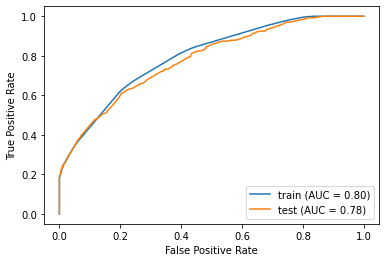

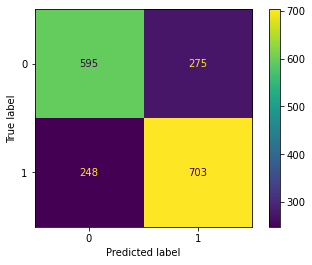

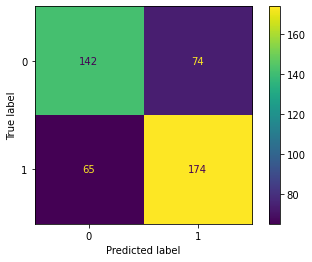

In [25]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [26]:
new_acc(probabilities)

(0.7613293051359517, 252)

### zero imp

In [33]:
rfeats= feature_select(zero_imp_train,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = zero_imp_train[rfeats]
X_test_best_for = zero_imp_test[rfeats]

Number of Trees: 150
criterion: entropy
Mean Cross-Val Score: 0.5321135029354207
Train Mean Accuracy: 0.7127951674903898
Test Mean Accuracy: 0.6923076923076923
Recall Score: 0.7280334728033473
Precision Score: 0.6987951807228916
F1 score: 0.7131147540983607


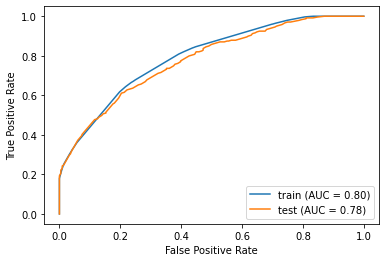

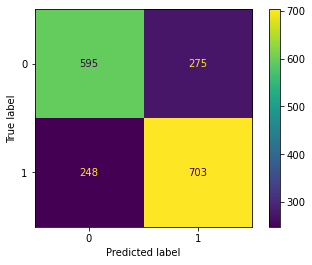

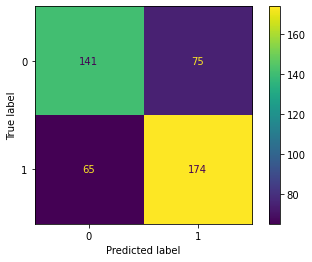

In [34]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [35]:
new_acc(probabilities)

(0.7621951219512195, 250)

# Bagging Classifier

Dec Tree Max Depth: 2
Dec Tree Criterion: gini
Bagging Max Samples: 3
Bag Max Features: 2
# of Base Estimators: 500
Mean Cross-Val Score: 0.5891468329727207
Train Mean Accuracy Score: 0.5673116508851379
Test Mean Accuracy Score: 0.5
Recall Score: 1.0
Precision Score: 0.5
F1 score: 0.6666666666666666


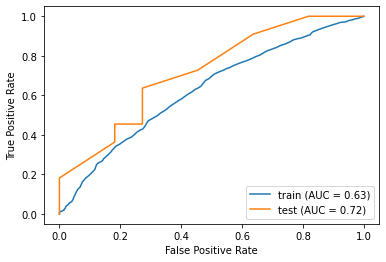

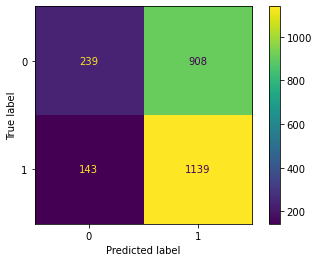

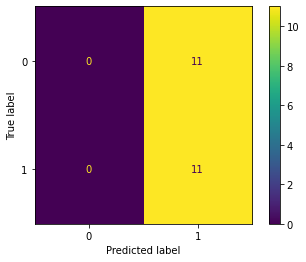

In [53]:
bagged(X_train_scaled,X_test_scaled,y_train,y_test)

# XGBoost

In [56]:
xfeats= feature_select(zero_imp_train,y_train,XGBClassifier,min_features=10)
X_train_best_x = zero_imp_train[xfeats]
X_test_best_x = zero_imp_test[xfeats]

XGBoost Learning Rate: 0.05
XGBoost Max Depth: 3
XGBoost Min Child Weight: 1
XGBoost Subsample: 0.7
XGBoost Estimators: 100
Stopped in Round: 15
Mean Cross-Val Score: 0.5409766238174027
Train Mean Accuracy Score: 0.6990531082750103
Test Mean Accuracy Score: 0.6363636363636364
Recall Score: 0.6363636363636364
Precision Score: 0.6363636363636364
F1 score: 0.6363636363636364


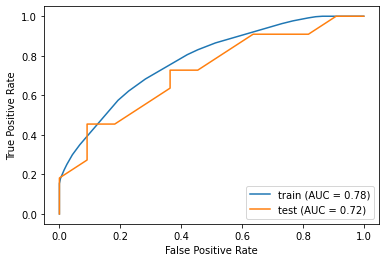

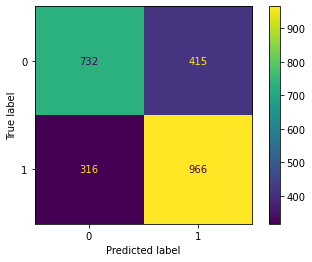

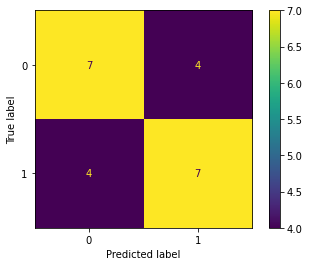

In [57]:
xgboost(X_train_best_x, X_test_best_x, y_train, y_test, cv=5)